<a href="https://colab.research.google.com/github/idrisello/free_projects/blob/main/satisfactionof_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [75]:
df=pd.read_csv("train_dataset.csv",index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [76]:
df.duplicated().sum()
df.isna().sum()
df.dropna(inplace=True)



In [10]:
df.satisfaction.value_counts()/len(df)

satisfaction
0    0.5
1    0.5
Name: count, dtype: float64

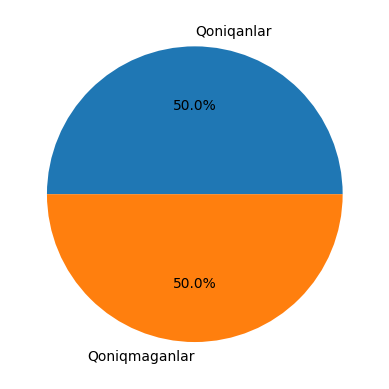

In [11]:
sat_rate=df.satisfaction.value_counts()/len(df)
plt.pie(sat_rate,labels=['Qoniqanlar','Qoniqmaganlar'],autopct='%1.1f%%')
plt.show()

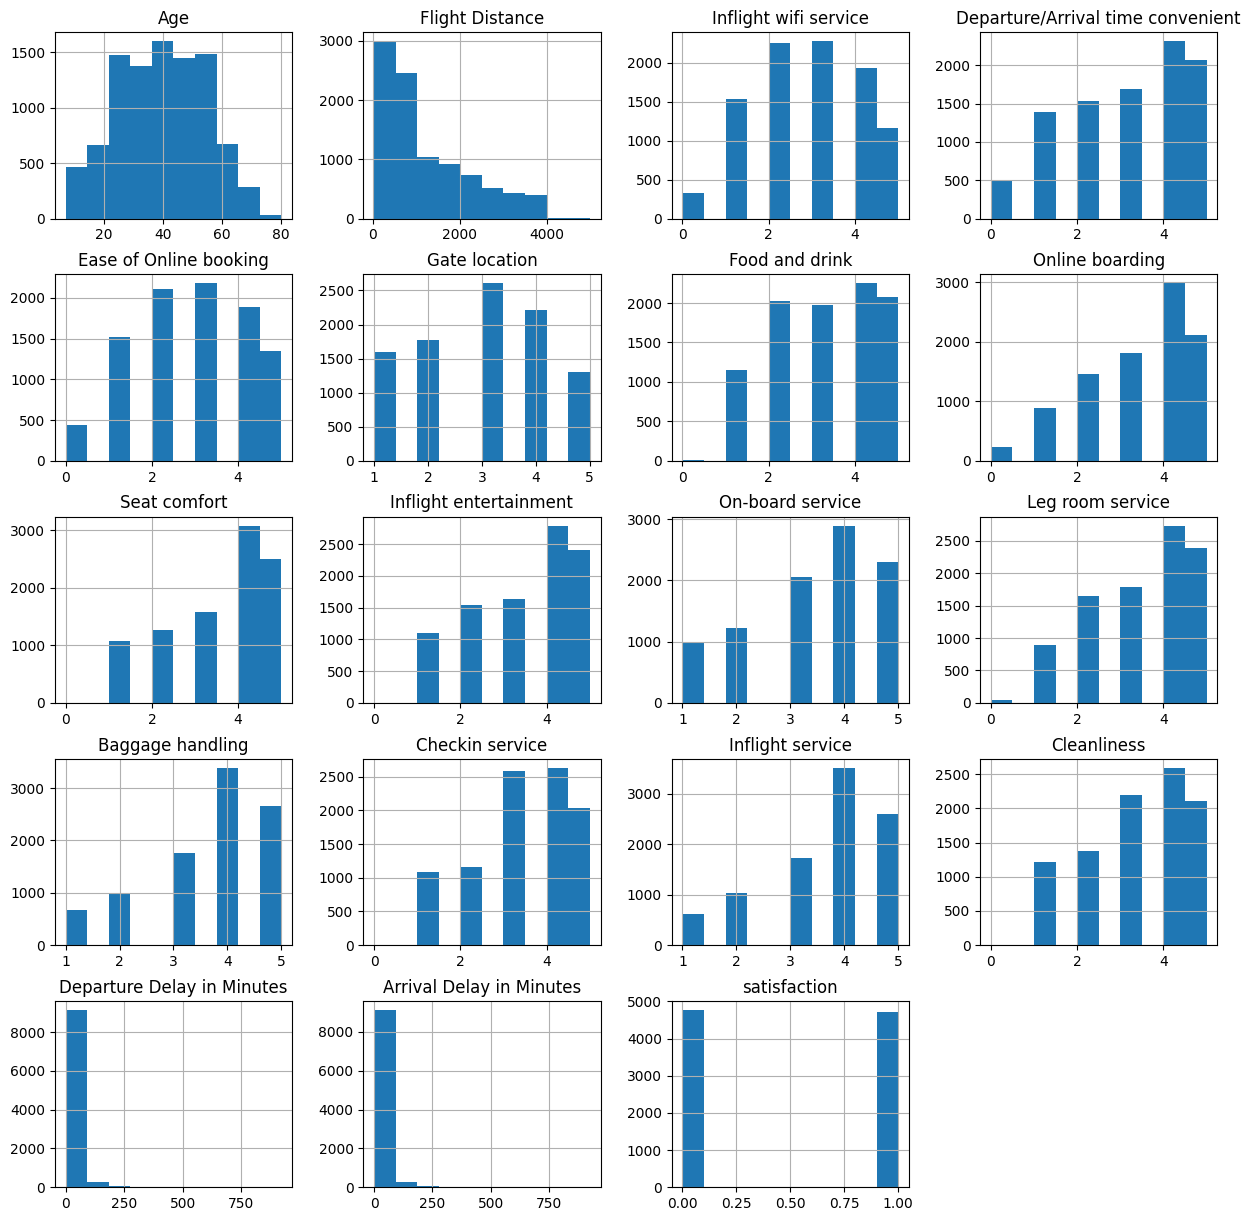

In [14]:
df.hist(figsize=(15,15))
plt.show()

In [22]:
sorted(df['Departure Delay in Minutes'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 156,
 157,
 158,
 160,
 161,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 192,
 193,
 194,
 195,
 196,


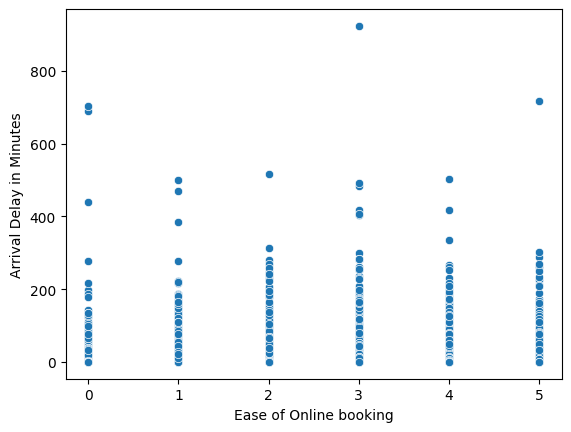

In [24]:
sns.scatterplot(data=df,x='Ease of Online booking',y='Arrival Delay in Minutes')
plt.show()

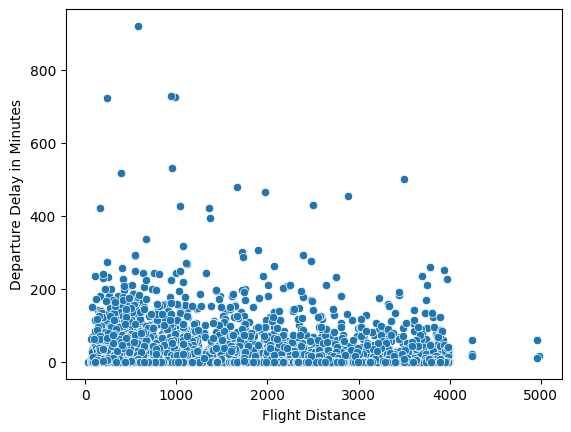

In [25]:
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes')
plt.show()

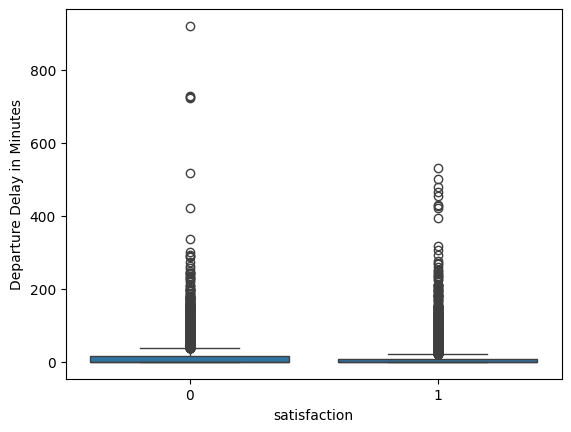

In [28]:
sns.boxplot(data=df,x='satisfaction',y='Departure Delay in Minutes')
plt.show()

# outlier olib tashlash modelnin aniqligini kamaytrmoqda

In [21]:
sorted(df['Arrival Delay in Minutes'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [77]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0},inplace=True)
df['Type of Travel'].replace({'Personal Travel':1,'Business travel':0},inplace=True)
df['Class'].replace({'Eco':0,'Eco Plus':1,'Business':2},inplace=True)

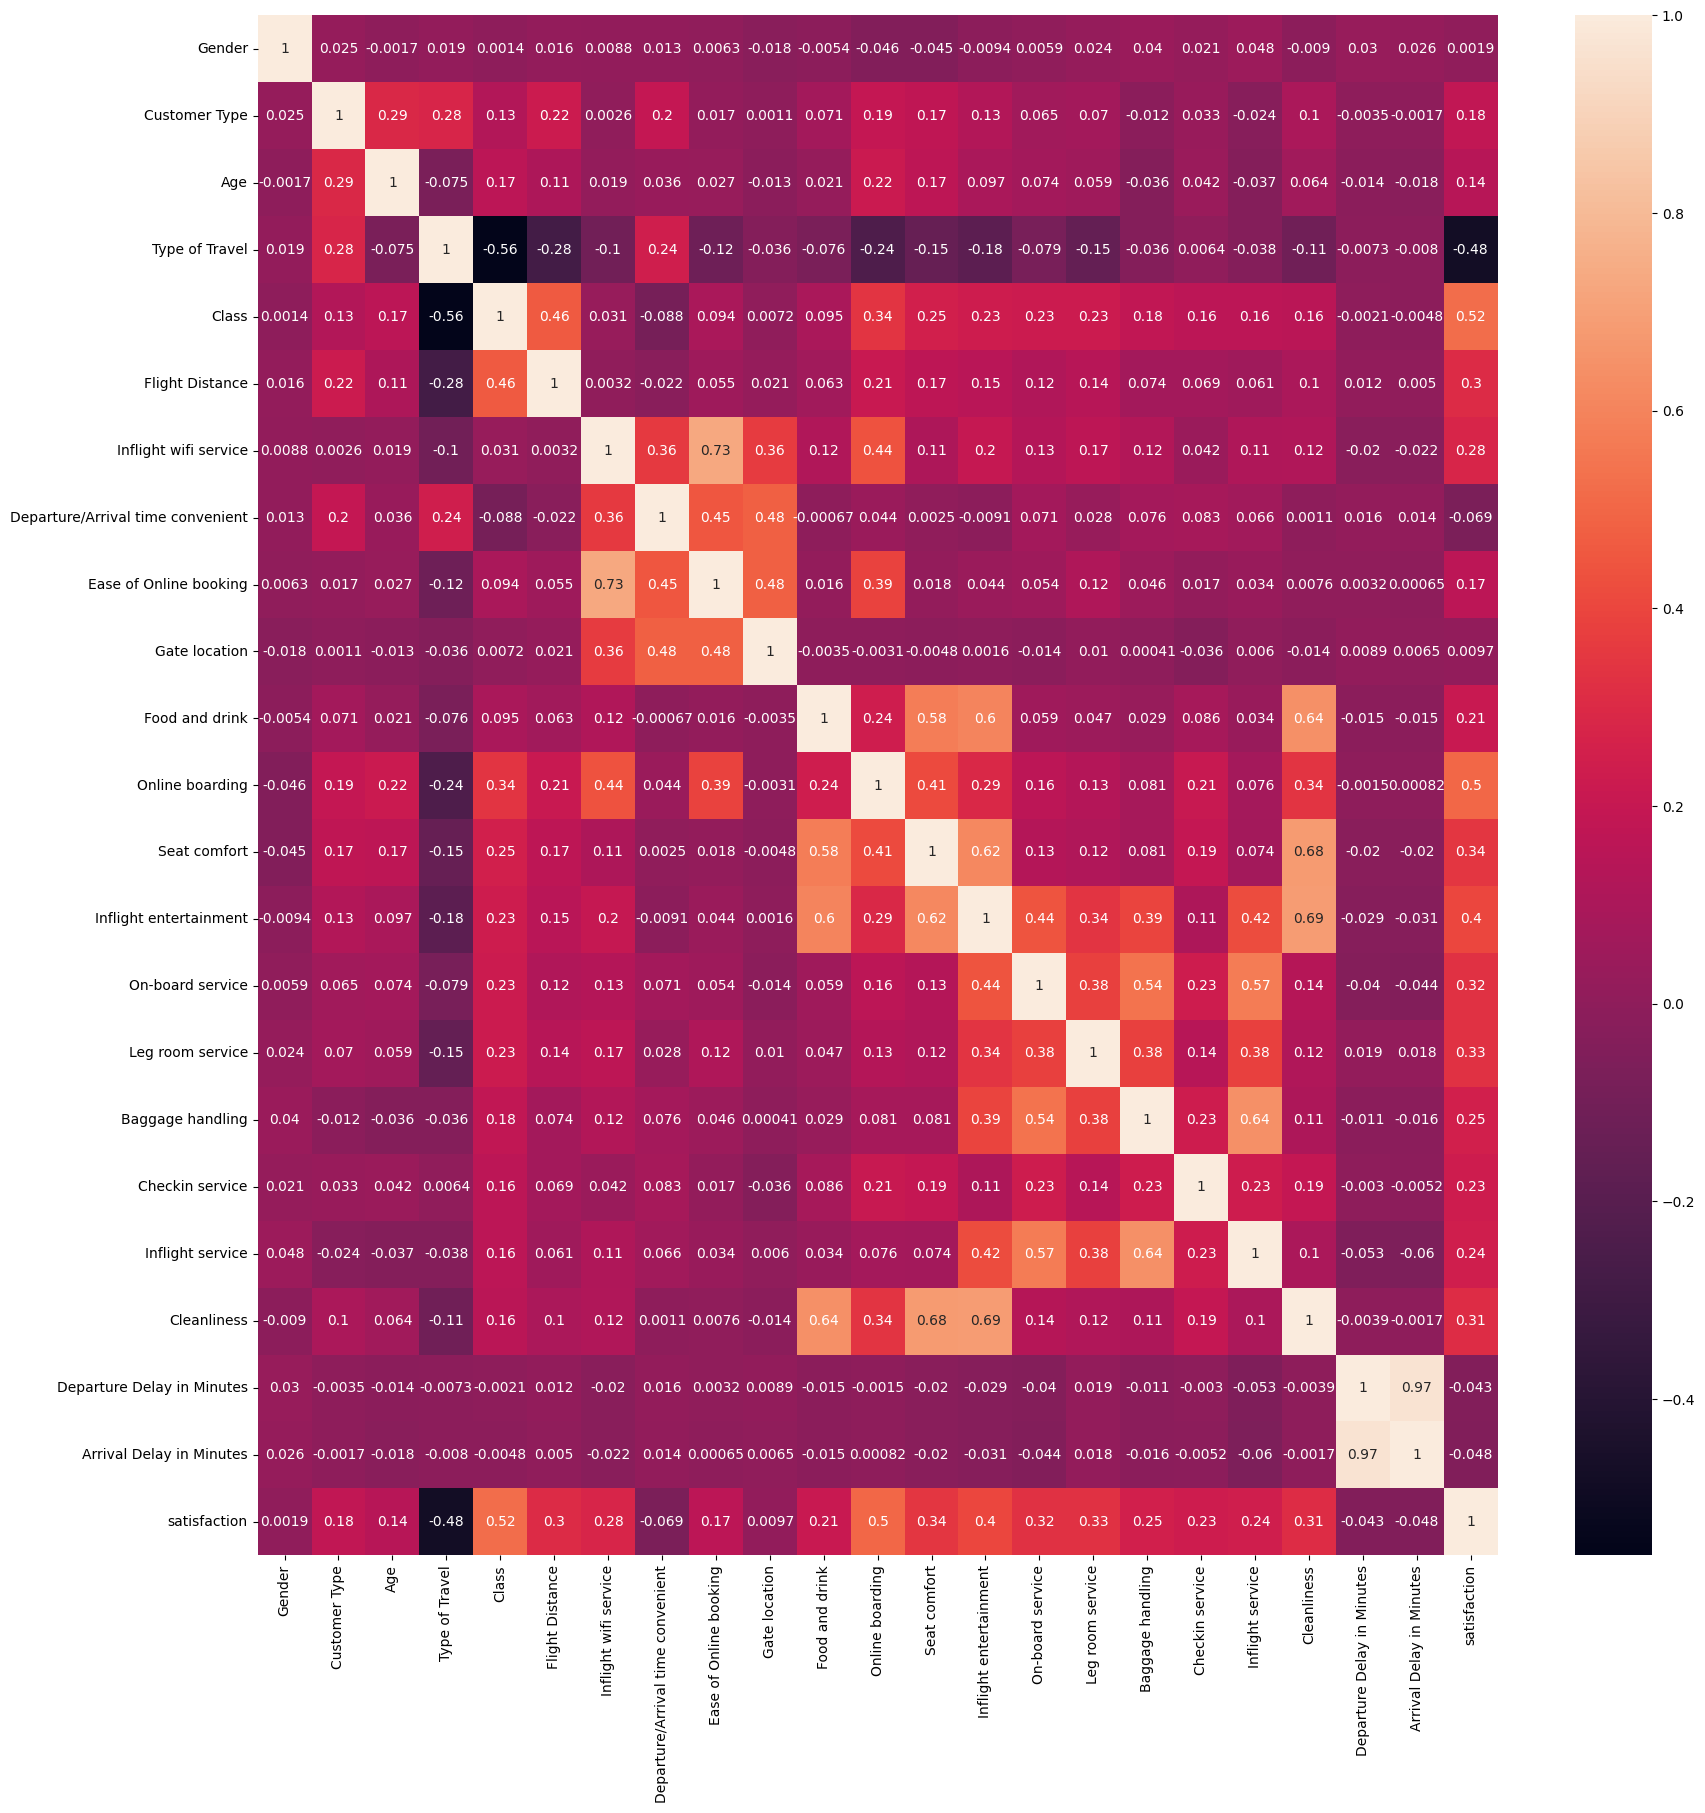

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

In [27]:
df.corrwith(df['satisfaction']).sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 52.196229
Online boarding                       50.276290
Inflight entertainment                40.155785
Seat comfort                          34.364154
Leg room service                      32.526450
On-board service                      32.453691
Cleanliness                           31.216866
Flight Distance                       30.194441
Inflight wifi service                 27.913688
Baggage handling                      24.746728
Inflight service                      24.053647
Checkin service                       23.278809
Food and drink                        21.043656
Customer Type                         17.892722
Ease of Online booking                16.513711
Age                                   14.288627
Gate location                          0.970936
Gender                                 0.191089
Departure Delay in Minutes            -4.340502
Arrival Delay in Minutes              -4

# KNN

# **25**

In [30]:
#25

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 11}

In [39]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Jaccard Score:", jaccard_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8998946259220232
Jaccard Score: 0.8158914728682171
[[866  64]
 [126 842]]


#**30** korelatsiya bn

In [40]:
X=df[['Class','Type of Travel','Online boarding','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness']]
y=df['satisfaction']


In [42]:

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=23)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Jaccard Score:", jaccard_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8756585879873551
Jaccard Score: 0.7670286278381047
[[885  62]
 [174 777]]


In [44]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 15}

# **all**

In [46]:
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [48]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Jaccard Score:", jaccard_score(y_test, y_pred))

Accuracy: 0.9093782929399368
Jaccard Score: 0.8271356783919598


In [50]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 13}

# 20

In [ ]:
df.corrwith(df['satisfaction']).sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 51.909759
Online boarding                       50.467134
Inflight entertainment                40.110912
Seat comfort                          34.206103
On-board service                      32.736067
Leg room service                      32.540474
Cleanliness                           31.004595
Flight Distance                       29.848434
Inflight wifi service                 27.749730
Baggage handling                      24.883855
Inflight service                      24.057963
Checkin service                       23.233674
Food and drink                        20.688143
Customer Type                         18.153531
Ease of Online booking                16.402476
Age                                   14.532704
Gate location                          0.742157
Gender                                -0.200681
Departure Delay in Minutes            -4.345636
Arrival Delay in Minutes              -4

In [52]:

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Jaccard Score:", jaccard_score(y_test, y_pred))

Accuracy: 0.8846863468634686
Jaccard Score: 0.782608695652174


In [54]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 13}

#15

In [56]:
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink','Customer Type','Ease of Online booking']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [57]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8983921982076963


In [ ]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 9}

# without outlier

In [72]:
df.drop(df[df['Departure Delay in Minutes']>300].index,inplace=True)
df.drop(df[df['Arrival Delay in Minutes']>250].index,inplace=True)
df.drop(df[df['Flight Distance']>4000].index,inplace=True)

In [59]:
df.corrwith(df['satisfaction']).sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 52.183461
Online boarding                       50.325069
Inflight entertainment                40.316253
Seat comfort                          34.348787
Leg room service                      32.648234
On-board service                      32.645472
Cleanliness                           31.186209
Flight Distance                       30.243598
Inflight wifi service                 27.948451
Baggage handling                      24.752651
Inflight service                      24.050356
Checkin service                       23.203834
Food and drink                        20.875594
Customer Type                         17.870800
Ease of Online booking                16.571088
Age                                   14.236424
Gate location                          0.983265
Gender                                 0.234018
Departure Delay in Minutes            -5.482697
Arrival Delay in Minutes              -6

In [60]:
#25

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']

In [61]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)

In [65]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Jaccard Score:", jaccard_score(y_test, y_pred))

Accuracy: 0.8930226400105918
Jaccard Score: 0.8011811023622047


In [64]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 5}

In [66]:
#30
X=df[['Class','Type of Travel','Online boarding','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness']]
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) #outlirli ds 1taga aniqligi kamaygan
print("Jaccard Score:", jaccard_score(y_test, y_pred))

Accuracy: 0.8686614590229048
Jaccard Score: 0.7602127145274353


In [67]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(KNeighborsClassifier(),param_grid)
knn_gsv.fit(X_train,y_train)
knn_gsv.best_params_

{'n_neighbors': 9}

# **SVM**

In [68]:
#25
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard_score(y_test,y_pred))

Accuracy: 0.908910366741692
Jaccard Score: 0.83203125


In [69]:
#30
X=df[['Class','Type of Travel','Online boarding','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness']]
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard_score(y_test,y_pred))

Accuracy: 0.8803124586257116
Jaccard Score: 0.7783770531993136


In [70]:
#20

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard_score(y_test,y_pred))

Accuracy: 0.9111611280285979
Accuracy: 0.9111611280285979
Jaccard Score: 0.8347697611425757


In [19]:
#15
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink','Customer Type','Ease of Online booking']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svm=SVC(gamma=0.1,kernel='rbf',max_iter=-1,C=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard_score(y_test,y_pred))

Accuracy: 0.9224149344631273
Accuracy: 0.9224149344631273
Jaccard Score: 0.8539745826065288


In [7]:
#all
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard_score(y_test,y_pred)) #yoq


Accuracy: 0.9184238270954138
Accuracy: 0.9184238270954138
Jaccard Score: 0.8461347253293562


In [9]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced']
}

In [13]:
param_grid = param_grid_svm

grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best parameters:", best_model.get_params())
print("Best accuracy:", best_score)


Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best accuracy: 0.9179515248480765


# **Randomforest**

In [85]:
25

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
rf=RandomForestClassifier(max_features=3)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(jaccard_score(y_test,y_pred))
#best model that i tried bu yam har run qilnganda ozfarmoqda 2marta 95ga chqdi qolganlarida 94, endi 93ga tushb ketdii
import joblib
joblib.dump(rf,'rf.joblib')


0.9363408521303258
0.8796208530805687


['rf.joblib']

In [108]:
test=pd.read_csv('test_dataset.csv',index_col=0)
test['Gender'].replace({'Male':1,'Female':0},inplace=True)
test['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0},inplace=True)
test['Type of Travel'].replace({'Personal Travel':1,'Business travel':0},inplace=True)
test['Class'].replace({'Eco':0,'Eco Plus':1,'Business':2},inplace=True)
test.fillna(test.mean(),inplace=True)
x=test[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
sc=StandardScaler()
x=sc.fit_transform(x)
rf=joblib.load('rf.joblib')
satisfaction=rf.predict(x)
satisfaction

array([0, 1, 1, ..., 0, 1, 0])

In [109]:
new_df = pd.DataFrame(satisfaction, index=test.index,columns=['satisfaction'])
new_df.to_csv('submission.csv')

In [30]:
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
rf=RandomForestClassifier(max_features=4)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9298892988929889


In [71]:
#20
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y,stratify=y ,test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
rf=RandomForestClassifier(max_features=4)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.931678575905729


In [61]:
param_grid={'max_features':[int(x)for x in np.linspace(1,len(X.columns),5)]}
grid=GridSearchCV(rf,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'max_features': 3}
RandomForestClassifier(max_features=3)


In [110]:
d=pd.read_csv('submission.csv')
d.tail()

,id,satisfaction
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
3999,4000,0


# **XGBClassifier**

In [41]:
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9328657314629258


In [42]:
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9292967280932681


In [43]:
#20
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance','Baggage handling','Checkin service','Food and drink']] #+20
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9292967280932681


# **Logistic regres**

In [44]:
X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred)) #noo

0.8496993987975952


In [45]:
#30
X=df[['Class','Type of Travel','Online boarding','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness']]
y=df['satisfaction']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=23)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8503196690485145


# **Decision Tree**

In [49]:
25

X=df[['Class','Type of Travel','Online boarding','Inflight wifi service','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance']]
y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
dt=DecisionTreeClassifier(max_features=7)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9218436873747495


In [47]:
param_grid={'max_features':[int(x)for x in np.linspace(1,len(X.columns),5)]}
grid=GridSearchCV(dt,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'max_features': 7}
DecisionTreeClassifier(max_features=7)
